##E-Commerce Product Recommendation System##

A well-developed recommendation system can significantly enhance the shopping experience on an e-commerce website, leading to improved customer acquisition and retention.

The recommendation system I’ve designed consists of three key components, tailored to different stages of a customer’s journey:

**Part I: Product Popularity-Based Recommendations for New Customers**

When a new customer visits the website for the first time, they are shown recommendations based on the most popular products. This approach helps in engaging them with top-selling items.

**Part II: Model-Based Collaborative Filtering for Returning Customers**

After a customer makes their first purchase, the system shifts to a more personalized approach. It uses collaborative filtering techniques, analyzing the customer’s purchase history and the ratings given by other users to suggest products that align with their preferences.

**Part III: Recommendations for New Websites Without Initial Ratings**

When launching a new e-commerce website without existing product ratings, the system initially relies on product popularity to suggest items. As the site gains data and user interactions, the system will evolve to incorporate collaborative filtering and provide more tailored recommendations.

This phased approach ensures that recommendations are relevant and personalized from the moment a customer arrives on the website until they become a repeat buyer.

**Recommendation System - Part I**

**Popularity-Based Recommendations for New Customers**

This component focuses on targeting new customers by showcasing the most popular products available on the website. Popularity-based recommendations are an effective strategy for engaging first-time visitors and serve as a robust starting point for a recommendation engine. By highlighting top-selling items, this approach helps quickly attract and engage new users, providing a solid foundation for further personalized recommendations as they continue to interact with the site.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
amazon_ratings = pd.read_csv('/content/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [ ]:
amazon_ratings.shape

(51474, 4)

In [ ]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B0000YUXI0,2143
B00006IV2F,704
B0000632EN,686
B0000CC64W,590
B00005O0MZ,585
B0000530ED,584
B00004TUBL,558
B0000AFUTL,558
B0000ZLEFU,550


<Axes: xlabel='ProductId'>

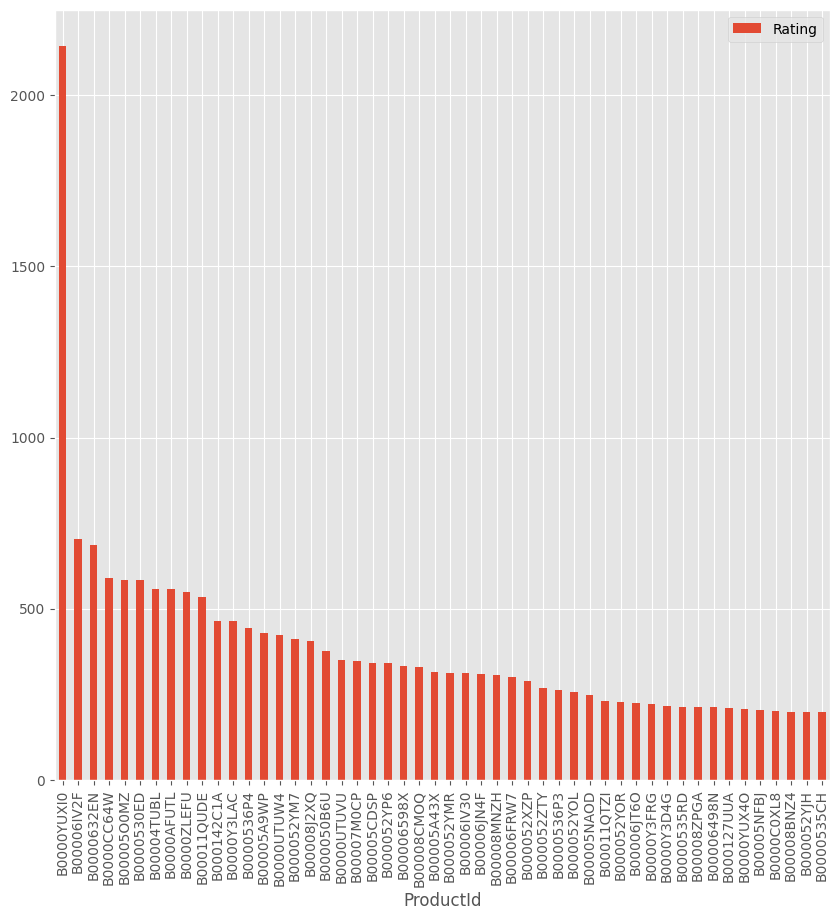

In [ ]:
most_popular.head(50).plot(kind = "bar", figsize=(10,10))

**Analysis:**

* The graph displays the most popular products sold by the business, listed in descending order of their sales figures.

* For instance, Product ID # B001MA0QY2 leads the chart with over 7,000 units sold. The subsequent top-selling product, ID # B0009V1YR8, has achieved sales of 3,000 units. This ranking highlights the relative popularity of each product based on total sales volume, providing insights into customer preferences and helping guide initial recommendations for new visitors.

**Recommendation System - Part II**

**Model-Based Collaborative Filtering**

This component employs a model-based collaborative filtering approach to recommend items based on a user's purchase history and the ratings given by other users with similar preferences.

By leveraging patterns identified from the preferences and behaviors of multiple users, this technique predicts products that a particular user is likely to be interested in. The model-based approach is chosen here because it effectively analyzes large datasets to uncover underlying patterns and correlations, enabling more accurate and personalized recommendations for each individual user.

In [ ]:
amazon_ratings1 = amazon_ratings.head(10000)

In [ ]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Decomposing the Matrix

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
# Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
X.index[99]

'6117036094'

In [ ]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation between all items and the item purchased by this customer based on items rated by other customers who bought the same thing.

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0558925278',
 '0733001998',
 '130414089X',
 '1304351475',
 '1412759676',
 '1457982633',
 '1987958179',
 '3222000565',
 '3227001055']

Here are the top ten products that the recommendation algorithm will display to the above customer based on previous customers' purchasing history on the website.

**Recommendation System - Part III**

For a firm with no user-item purchase history, a search engine-based recommendation system can be created for users. Product suggestions might be based on the textual clustering analysis provided in the product description.

In [ ]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
product_descriptions = pd.read_csv('/content/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [ ]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

In [ ]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

,product_description
0,"Not only do angles make joints stronger, they ..."
1,BEHR Premium Textured DECKOVER is an innovativ...
2,Classic architecture meets contemporary design...
3,The Grape Solar 265-Watt Polycrystalline PV So...
4,Update your bathroom with the Delta Vero Singl...
5,Achieving delicious results is almost effortle...
6,The Quantum Adjustable 2-Light LED Black Emerg...
7,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,Valley View Industries Metal Stakes (4-Pack) a...


Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1.shape

(500, 8932)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


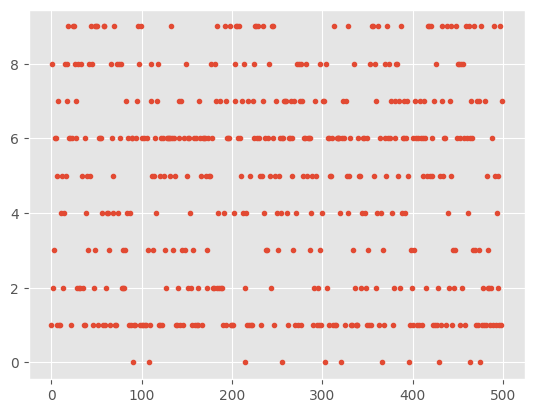

In [ ]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

**Output**

* Product recommendations based on the user's current product selection.
* To propose relevant products based on frequently purchased items.

Top words in each cluster according to the product description

In [ ]:
# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 door
 doors
 wood
 nickel
 finished
 bronze
 interior
 vanity
 easy
 slab
Cluster 1:
 ft
 patio
 frame
 fabric
 resistant
 outdoor
 steel
 12
 coated
 easy
Cluster 2:
 light
 watt
 air
 ft
 energy
 water
 use
 fan
 home
 easy
Cluster 3:
 water
 steel
 20
 helps
 metal
 sink
 flush
 design
 toilet
 insulation
Cluster 4:
 wall
 piece
 trim
 finish
 tile
 color
 use
 snow
 walls
 paint
Cluster 5:
 brush
 water
 seal
 dust
 garage
 away
 roof
 floor
 cleaning
 easy
Cluster 6:
 window
 roller
 bamboo
 36
 vinyl
 shades
 rug
 mount
 width
 door
Cluster 7:
 storage
 shelves
 cutting
 shelf
 adjustable
 solid
 unit
 commercial
 chrome
 metal
Cluster 8:
 tool
 power
 grip
 volt
 battery
 free
 lithium
 lbs
 impact
 m12
Cluster 9:
 watering
 plants
 easy
 garden
 water
 plastic
 miracle
 gro
 carrying
 spray


In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("book")

Cluster 1:
 ft
 patio
 frame
 fabric
 resistant
 outdoor
 steel
 12
 coated
 easy


In [ ]:
show_recommendations("cutting tool")

Cluster 8:
 tool
 power
 grip
 volt
 battery
 free
 lithium
 lbs
 impact
 m12


Once a cluster has been determined based on the user's search terms, the recommendation system can present items from the appropriate product clusters using the product descriptions.

**Summary**

 This approach is ideal for new e-commerce websites without prior user-item purchase/rating history. This recommendation system will assist consumers in getting a decent recommendation to begin with, and after the buyers have a purchasing history, the recommendation engine may employ the model-based collaborative filtering method.